In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt 
import seaborn as sns

In [19]:
data = pd.read_csv('TelcoCustomerChurn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
na = data.isnull().sum()
print(na)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Specify features to exclude
exclude_features = ["customerID", "tenure", "MonthlyCharges", "TotalCharges"]

# Iterate through features and display unique values
for feature in data.columns:
  if feature not in exclude_features:
    unique_values = data[feature].unique()
    print(f"Feature: {feature}")
  
    # Print all unique values using a loop (prevents large output truncation)
    for value in unique_values:
      print(f"\t- {value}")

Feature: gender
	- Female
	- Male
Feature: SeniorCitizen
	- 0
	- 1
Feature: Partner
	- Yes
	- No
Feature: Dependents
	- No
	- Yes
Feature: PhoneService
	- No
	- Yes
Feature: MultipleLines
	- No phone service
	- No
	- Yes
Feature: InternetService
	- DSL
	- Fiber optic
	- No
Feature: OnlineSecurity
	- No
	- Yes
	- No internet service
Feature: OnlineBackup
	- Yes
	- No
	- No internet service
Feature: DeviceProtection
	- No
	- Yes
	- No internet service
Feature: TechSupport
	- No
	- Yes
	- No internet service
Feature: StreamingTV
	- No
	- Yes
	- No internet service
Feature: StreamingMovies
	- No
	- Yes
	- No internet service
Feature: Contract
	- Month-to-month
	- One year
	- Two year
Feature: PaperlessBilling
	- Yes
	- No
Feature: PaymentMethod
	- Electronic check
	- Mailed check
	- Bank transfer (automatic)
	- Credit card (automatic)
Feature: Churn
	- No
	- Yes


Churn
No     5174
Yes    1869
Name: count, dtype: int64


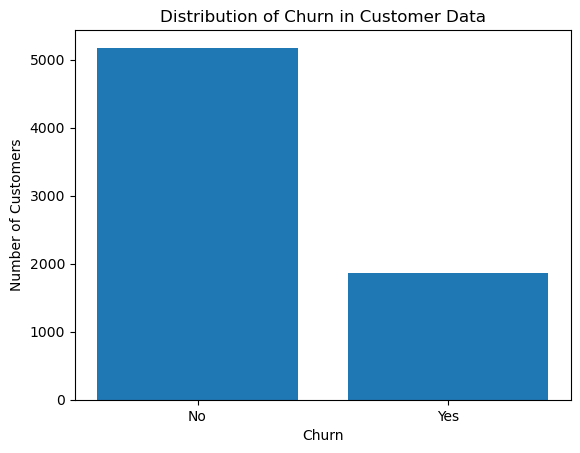

In [10]:
churn_counts = data["Churn"].value_counts()
print(churn_counts)

import matplotlib.pyplot as plt

plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.title("Distribution of Churn in Customer Data")
plt.show()

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


def encode_categorical_features(data, exclude_features):
  """
  Encodes categorical features in a DataFrame and returns the encoded DataFrame 
  along with an encoding map for future reference.

  Args:
      data (pandas.DataFrame): The DataFrame containing the data.
      exclude_features (list): A list of feature names to exclude from encoding.

  Returns:
      tuple: A tuple containing two elements:
          - encoded_data (pandas.DataFrame): The DataFrame with encoded categorical features.
          - encoding_map (dict): A dictionary storing the encoding map for each feature.
  """

  # Identify categorical features (assuming all others are numerical)
  categorical_features = [col for col in data.columns if col not in exclude_features and data[col].dtype == 'object']

  # Create a dictionary to store encoding maps with original categories
  encoding_map = {}

  # Encode categorical features
  encoder = LabelEncoder()
  for feature in categorical_features:
    categories = data[feature].unique()  # Get unique categories
    encoding_map[feature] = {"categories": categories.tolist(), "mapping": encoder.fit_transform(categories).tolist()}
    data[feature] = encoder.transform(data[feature])

  return data, encoding_map


# Assuming data is a pandas DataFrame loaded from your source

# Specify features to exclude from encoding
exclude_features = ["customerID", "tenure", "MonthlyCharges", "TotalCharges"]

# Encode categorical features and get encoding map
encoded_data, encoding_map = encode_categorical_features(data.copy(), exclude_features)  # Copy data to avoid modifying original

print("Data after encoding categorical features:")
print(encoded_data.head())  # Display the first few rows to see encoded values

# Print the enhanced encoding map (using a loop for clarity)
print("\nEnhanced Encoding Map:")
for feature, mapping_dict in encoding_map.items():
  print(f"{feature}:")
  for category, encoded_value in zip(mapping_dict["categories"], mapping_dict["mapping"]):
    print(f"\t- {category}: {encoded_value}")


Data after encoding categorical features:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0  

In [25]:
df = encoded_data.drop('customerID', axis=1)

In [30]:
# Try converting 'TotalCharges' to float, replacing errors with NaN
df['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

print(df.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [35]:
corr_matrix = df.corr()

churn_correlations = corr_matrix["Churn"]
print("\nCorrelations with Churn:")
print(churn_correlations.sort_values(ascending=False))



Correlations with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


Top 5 Correlated Features:

- Tenure: (**-0.352**): This indicates a moderate negative correlation. Customers with longer tenures (higher values in the "tenure" feature) tend to churn less.
  
- Contract (**-0.397**): This is a moderate negative correlation. Customers with longer contract durations (higher values in the "Contract" feature) are less likely to churn.

- TechSupport (**-0.282**): This is a weak negative correlation. Customers who subscribe to tech support are slightly less likely to churn.
  
- OnlineSecurity (**-0.289**): This is a weak negative correlation. Customers who subscribe to online security are slightly less likely to churn.
  
- OnlineBackup (**-0.196**): This is a weak negative correlation. Customers who subscribe to online backup are slightly less likely to churn.

/Users/kevincarrillo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


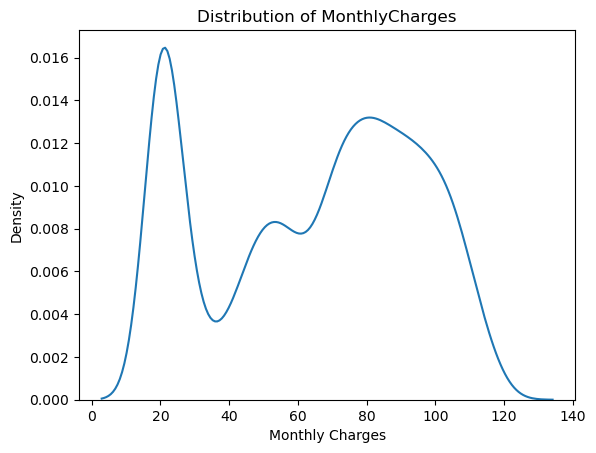

Average Tenure by Churn:
Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64


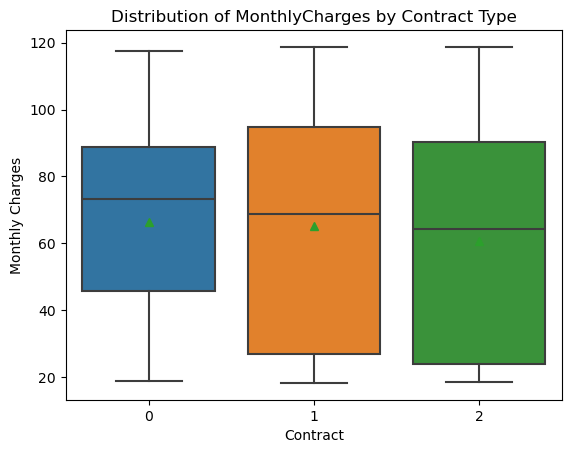

In [40]:
sns.kdeplot(df['MonthlyCharges']) 
plt.title("Distribution of MonthlyCharges")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

churn_groups = df.groupby('Churn')
tenure_means = churn_groups['tenure'].mean()
print("Average Tenure by Churn:")
print(tenure_means)


sns.boxplot(
    x = "Contract",
    y = "MonthlyCharges",
    showmeans=True,
    data=df
)
plt.title("Distribution of MonthlyCharges by Contract Type")
plt.xlabel("Contract")
plt.ylabel("Monthly Charges")
plt.show()


df['Has_TechSupport_and_OnlineSecurity'] = df["TechSupport"] & df["OnlineSecurity"]

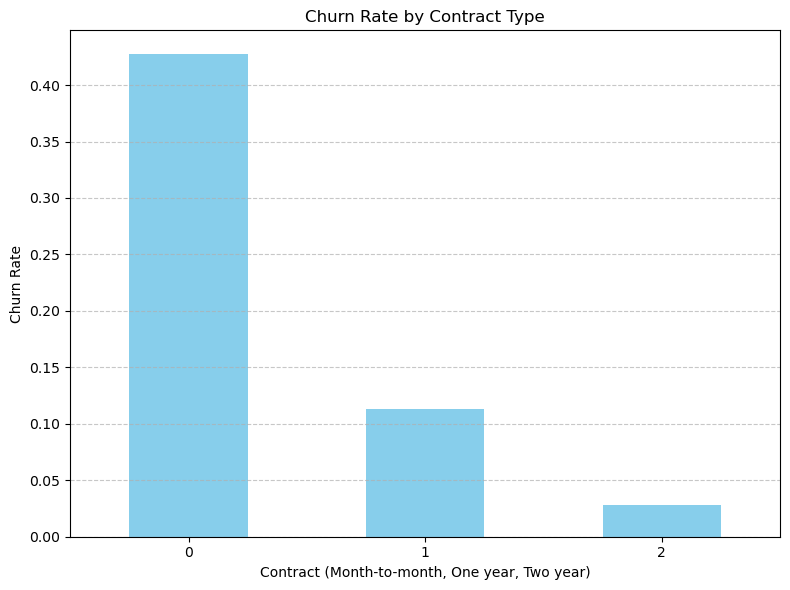

In [41]:
churn_by_contract = df.groupby('Contract')['Churn'].mean()

plt.figure(figsize=(8, 6))
churn_by_contract.plot(kind='bar', color='skyblue')
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract (Month-to-month, One year, Two year)")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_TechSupport_and_OnlineSecurity
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,2
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,0
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,1,0


In [44]:
corr_matrix = df.corr()

chrn_corr = corr_matrix["Churn"]
print("\nCorrelations with Churn:")
print(chrn_corr.sort_values(ascending=False))



Correlations with Churn:
Churn                                 1.000000
MonthlyCharges                        0.193356
PaperlessBilling                      0.191825
SeniorCitizen                         0.150889
PaymentMethod                         0.107062
MultipleLines                         0.038037
PhoneService                          0.011942
gender                               -0.008612
StreamingTV                          -0.036581
StreamingMovies                      -0.038492
InternetService                      -0.047291
Partner                              -0.150448
Dependents                           -0.164221
DeviceProtection                     -0.178134
OnlineBackup                         -0.195525
TotalCharges                         -0.199484
TechSupport                          -0.282492
OnlineSecurity                       -0.289309
Has_TechSupport_and_OnlineSecurity   -0.290698
tenure                               -0.352229
Contract                          

Top 5 Correlated Features:

- Tenure: (**-0.352**): Customers with longer tenures (higher values in the "tenure" feature) tend to churn less.
  
- Contract (**-0.397**): Customers with longer contract durations (higher values in the "Contract" feature) are less likely to churn.

- TechSupport (**-0.282**): Customers who subscribe to tech support are slightly less likely to churn.

- TechSupport+OnlineSecurity (**-0.291**): Customers who subscribe to tech support & Online security are slightly less likely to churn
  
- OnlineSecurity (**-0.289**): Customers who subscribe to online security are slightly less likely to churn.
  
- OnlineBackup (**-0.196**): Customers who subscribe to online backup are slightly less likely to churn.

## LOGISTIC REGRESSION

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = df[["tenure", "Contract", "Has_TechSupport_and_OnlineSecurity"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.7828246983676366
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.46      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

X = df[["tenure", "Contract", "Has_TechSupport_and_OnlineSecurity"]]
y = df["Churn"]

# Oversample the minority class
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)  # Oversample training data

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.6792051100070973
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1036
           1       0.45      0.88      0.59       373

    accuracy                           0.68      1409
   macro avg       0.69      0.74      0.66      1409
weighted avg       0.80      0.68      0.70      1409



## RANDOM FOREST

In [3]:
data = pd.read_csv('TelcoCustomerChurn.csv')

In [6]:
rdf = data.drop('customerID', axis=1)

In [11]:
rdf['Has_TechSupport_and_OnlineSecurity'] = (rdf["TechSupport"] == 'Yes') & (rdf["OnlineSecurity"] == 'Yes')

In [18]:
rdf['TotalCharges'] = pd.to_numeric(rdf['TotalCharges'], errors='coerce')

In [27]:
# Feature selection (assuming 'Churn' is the target variable)
X = rdf.drop('Churn', axis=1)
y = rdf["Churn"]

# Categorical feature encoding (replace with OneHotEncoder if needed)
le = LabelEncoder()
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest model
model = RandomForestClassifier(n)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1036
         Yes       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409


Confusion Matrix:
[[946  90]
 [207 166]]


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = rdf.drop('Churn', axis=1)
y = rdf["Churn"]

# Categorical feature encoding (replace with OneHotEncoder if needed)
le = LabelEncoder()
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 8, 12],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]   # Minimum samples required at each leaf node
}

# Create and train the random forest model with GridSearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = model.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Print the best hyperparameters found by GridSearchCV
print("\nBest Hyperparameters:")
print(model.best_params_)


Accuracy: 0.8048261178140526
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.68      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409


Confusion Matrix:
[[945  91]
 [184 189]]

Best Hyperparameters:
{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = rdf.drop('Churn', axis=1)
y = rdf["Churn"]

le = LabelEncoder()
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the specific hyperparameters found by GridSearchCV
best_params = {'max_depth': 8, 'n_estimators': 200}

# Create and train the random forest model with the best hyperparameters
model = RandomForestClassifier(**best_params)  # Unpack dictionary as arguments
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.8090844570617459
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[950  86]
 [183 190]]


# Hyperparameters: 

**max_depth: 8 (maximum depth of individual trees)**
**n_estimators: 200 (number of trees in the forest)**

# Evaluation Metrics:

**Accuracy: 0.809 (80.9%)** - The proportion of correct predictions made by the model.

# Classification Report:
Provides a detailed breakdown of the model's performance for each class ("No churn" and "Yes churn").

**Precision:** Measures the proportion of positive predictions that were actually correct for each class.
**"No churn": 0.84** (84% of predicted "No churn" cases were truly non-churning customers).
**"Yes churn": 0.69** (69% of predicted "Yes churn" cases were truly churning customers).

# Recall: 
Measures the proportion of actual positive cases that were correctly identified by the model for each class.
**"No churn": 0.92** (92% of actual non-churning customers were correctly predicted).
**"Yes churn": 0.51** (51% of actual churning customers were correctly predicted).

# F1-Score: 
Harmonic mean of precision and recall, offering a balanced view of both.
**"No churn": 0.88**
**"Yes churn": 0.59**

# Interpretation:

This random forest model achieved an accuracy of **80.9%**, indicating it can correctly predict customer churn in a significant portion of cases. The classification report reveals a trade-off between precision and recall for the two classes. The model performs better at identifying non-churning customers (higher precision and recall) compared to churning customers. The confusion matrix provides a visual confirmation of this, with more correct predictions on the diagonal for the "No churn" class.

# Overall:

This tuned random forest model demonstrates promising performance for customer churn prediction. You can consider using this model for further analysis or explore techniques to improve the identification of churning customers (potentially using different models or feature engineering approaches).